## Calculation

In [1]:
import pandas as pd
import numpy as np

file_path = 'dataset//wealth_factor.csv'
df = pd.read_csv(file_path,index_col=["Country","Field"])
df.head()

2010  \
Country Field                                                          
Austria B. Mining and quarrying                             1.955250   
        C. Manufacturing                                    1.741093   
        D. Electricity; gas, steam and air conditioning...  2.522561   
        E. Water supply; sewerage, waste management and...  1.533878   
        F. Construction                                     1.540196   

                                                                2011  \
Country Field                                                          
Austria B. Mining and quarrying                             1.778384   
        C. Manufacturing                                    1.516222   
        D. Electricity; gas, steam and air conditioning...  2.282622   
        E. Water supply; sewerage, waste management and...  1.238992   
        F. Construction                                     1.165168   

                                                                2012  \
Country Field                                                          
Austria B. Mining and quarrying                             1.967915   
        C. Manufacturing                                    1.670233   
        D. Electricity; gas, steam and air conditioning...  2.552550   
        E. Water supply; sewerage, waste management and...  1.365044   
        F. Construction                                     1.268500   

                                                                2013  \
Country Field                                                          
Austria B. Mining and quarrying                             2.014517   
        C. Manufacturing                                    1.735520   
        D. Electricity; gas, steam and air conditioning...  2.595184   
        E. Water supply; sewerage, waste management and...  1.413347   
        F. Construction                                     1.289226   

                                                                2014  \
Country Field                                                          
Austria B. Mining and quarrying                             1.840500   
        C. Manufacturing                                    1.602644   
        D. Electricity; gas, steam and air conditioning...  2.240771   
        E. Water supply; sewerage, waste management and...  1.452806   
        F. Construction                                     1.466427   

                                                                2015  \
Country Field                                                          
Austria B. Mining and quarrying                             1.792961   
        C. Manufacturing                                    1.531441   
        D. Electricity; gas, steam and air conditioning...  2.274178   
        E. Water supply; sewerage, waste management and...  1.248317   
        F. Construction                                     1.146739   

                                                                2016  \
Country Field                                                          
Austria B. Mining and quarrying                             1.566115   
        C. Manufacturing                                    1.372666   
        D. Electricity; gas, steam and air conditioning...  2.046909   
        E. Water supply; sewerage, waste management and...  1.116753   
        F. Construction                                     1.027285   

                                                                2017  \
Country Field                                                          
Austria B. Mining and quarrying                             1.756086   
        C. Manufacturing                                    1.415580   
        D. Electricity; gas, steam and air conditioning...  2.092098   
        E. Water supply; sewerage, waste management and...  1.153147   
        F. Construction                                     1.064035   

                        

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

def regress(years_learning, ys, years_predict, retype='linear', fit_intercept=True, degree=None):
    if retype == 'linear':
        lm = LinearRegression(fit_intercept=fit_intercept)
    elif retype == 'polynomial':
        lm = Pipeline([('poly', PolynomialFeatures(degree=degree)),
                   ('linear', LinearRegression(fit_intercept=fit_intercept))])
    else:
        return print('Need to specify other regression type.')
    lm.fit(years_learning,ys)
    return lm.predict(years_predict)

In [3]:
# Linear regression example
years_learning = np.array([int(i) for i in df.columns]).reshape(-1, 1)
to_predict = np.array([range(2010,2023)]).reshape(-1, 1)
result = np.array(list(map(lambda x: regress(years_learning, x.reshape(-1, 1), to_predict, retype='linear'), df.to_numpy())))

In [4]:
for i,prediction_year in enumerate(to_predict):
    df[str(prediction_year[0])]=result[:,i]
df.head()

2010  \
Country Field                                                          
Austria B. Mining and quarrying                             1.913595   
        C. Manufacturing                                    1.695954   
        D. Electricity; gas, steam and air conditioning...  2.518978   
        E. Water supply; sewerage, waste management and...  1.439189   
        F. Construction                                     1.392203   

                                                                2011  \
Country Field                                                          
Austria B. Mining and quarrying                             1.897128   
        C. Manufacturing                                    1.663734   
        D. Electricity; gas, steam and air conditioning...  2.467419   
        E. Water supply; sewerage, waste management and...  1.406647   
        F. Construction                                     1.353659   

                                                                2012  \
Country Field                                                          
Austria B. Mining and quarrying                             1.880662   
        C. Manufacturing                                    1.631514   
        D. Electricity; gas, steam and air conditioning...  2.415860   
        E. Water supply; sewerage, waste management and...  1.374105   
        F. Construction                                     1.315114   

                                                                2013  \
Country Field                                                          
Austria B. Mining and quarrying                             1.864195   
        C. Manufacturing                                    1.599293   
        D. Electricity; gas, steam and air conditioning...  2.364302   
        E. Water supply; sewerage, waste management and...  1.341562   
        F. Construction                                     1.276569   

                                                                2014  \
Country Field                                                          
Austria B. Mining and quarrying                             1.847728   
        C. Manufacturing                                    1.567073   
        D. Electricity; gas, steam and air conditioning...  2.312743   
        E. Water supply; sewerage, waste management and...  1.309020   
        F. Construction                                     1.238024   

                                                                2015  \
Country Field                                                          
Austria B. Mining and quarrying                             1.831262   
        C. Manufacturing                                    1.534853   
        D. Electricity; gas, steam and air conditioning...  2.261184   
        E. Water supply; sewerage, waste management and...  1.276478   
        F. Construction                                     1.199480   

                                                                2016  \
Country Field                                                          
Austria B. Mining and quarrying                             1.814795   
        C. Manufacturing                                    1.502633   
        D. Electricity; gas, steam and air conditioning...  2.209626   
        E. Water supply; sewerage, waste management and...  1.243936   
        F. Construction                                     1.160935   

                                                                2017  \
Country Field                                                          
Austria B. Mining and quarrying                             1.798329   
        C. Manufacturing                                    1.470412   
        D. Electricity; gas, steam and air conditioning...  2.158067   
        E. Water supply; sewerage, waste management and...  1.211394   
        F. Construction                                     1.122390   

                        

In [5]:
df.to_csv("dataset//trends_real_wealth_from_2010_to_2022.csv")

## Analysis

### Calculate "slope" of linear regression

In [6]:
df["diff"]=df["2021"]-df["2020"]
df.head()

2010  \
Country Field                                                          
Austria B. Mining and quarrying                             1.913595   
        C. Manufacturing                                    1.695954   
        D. Electricity; gas, steam and air conditioning...  2.518978   
        E. Water supply; sewerage, waste management and...  1.439189   
        F. Construction                                     1.392203   

                                                                2011  \
Country Field                                                          
Austria B. Mining and quarrying                             1.897128   
        C. Manufacturing                                    1.663734   
        D. Electricity; gas, steam and air conditioning...  2.467419   
        E. Water supply; sewerage, waste management and...  1.406647   
        F. Construction                                     1.353659   

                                                                2012  \
Country Field                                                          
Austria B. Mining and quarrying                             1.880662   
        C. Manufacturing                                    1.631514   
        D. Electricity; gas, steam and air conditioning...  2.415860   
        E. Water supply; sewerage, waste management and...  1.374105   
        F. Construction                                     1.315114   

                                                                2013  \
Country Field                                                          
Austria B. Mining and quarrying                             1.864195   
        C. Manufacturing                                    1.599293   
        D. Electricity; gas, steam and air conditioning...  2.364302   
        E. Water supply; sewerage, waste management and...  1.341562   
        F. Construction                                     1.276569   

                                                                2014  \
Country Field                                                          
Austria B. Mining and quarrying                             1.847728   
        C. Manufacturing                                    1.567073   
        D. Electricity; gas, steam and air conditioning...  2.312743   
        E. Water supply; sewerage, waste management and...  1.309020   
        F. Construction                                     1.238024   

                                                                2015  \
Country Field                                                          
Austria B. Mining and quarrying                             1.831262   
        C. Manufacturing                                    1.534853   
        D. Electricity; gas, steam and air conditioning...  2.261184   
        E. Water supply; sewerage, waste management and...  1.276478   
        F. Construction                                     1.199480   

                                                                2016  \
Country Field                                                          
Austria B. Mining and quarrying                             1.814795   
        C. Manufacturing                                    1.502633   
        D. Electricity; gas, steam and air conditioning...  2.209626   
        E. Water supply; sewerage, waste management and...  1.243936   
        F. Construction                                     1.160935   

                                                                2017  \
Country Field                                                          
Austria B. Mining and quarrying                             1.798329   
        C. Manufacturing                                    1.470412   
        D. Electricity; gas, steam and air conditioning...  2.158067   
        E. Water supply; sewerage, waste management and...  1.211394   
        F. Construction                                     1.122390   

                        

### List values with tendency to grow

In [31]:
df["diff"][df["diff"]>0].head(50)

Country      Field                                                 
Colombia     F. Construction                                           0.002025
Egypt        P. Education                                              0.002704
Estonia      P. Education                                              0.002289
Philippines  B. Mining and quarrying                                   0.003399
             D. Electricity; gas, steam and air conditioning supply    0.001509
             J. Information and communication                          0.005596
             S. Other service activities                               0.000165
Ukraine      F. Construction                                           0.003768
             Total                                                     0.000834
Name: diff, dtype: float64

### Look for countries with not enought Fields

In [30]:
df.groupby(level=0).size()

Country
Austria           18
Canada             1
Colombia           2
Ecuador            2
Egypt             19
Estonia           19
Germany           19
Greece            19
Indonesia          1
Ireland           17
Japan             14
Norway            20
Panama             2
Philippines       19
Poland            20
Singapore          1
Slovakia          20
Ukraine            2
United Kingdom    21
United States     22
dtype: int64

### Filter out countries that have less than 3 fields

In [32]:
not_enough_data = (df.groupby(level=0).size()<3)
not_enough_data_indices = not_enough_data[not_enough_data].index
reduced_data = df.drop(index=not_enough_data_indices,level=0)
reduced_data["diff"][reduced_data["diff"]>0].head(50)

Country      Field                                                 
Egypt        P. Education                                              0.002704
Estonia      P. Education                                              0.002289
Philippines  B. Mining and quarrying                                   0.003399
             D. Electricity; gas, steam and air conditioning supply    0.001509
             J. Information and communication                          0.005596
             S. Other service activities                               0.000165
Name: diff, dtype: float64

### Visualize trends for fields

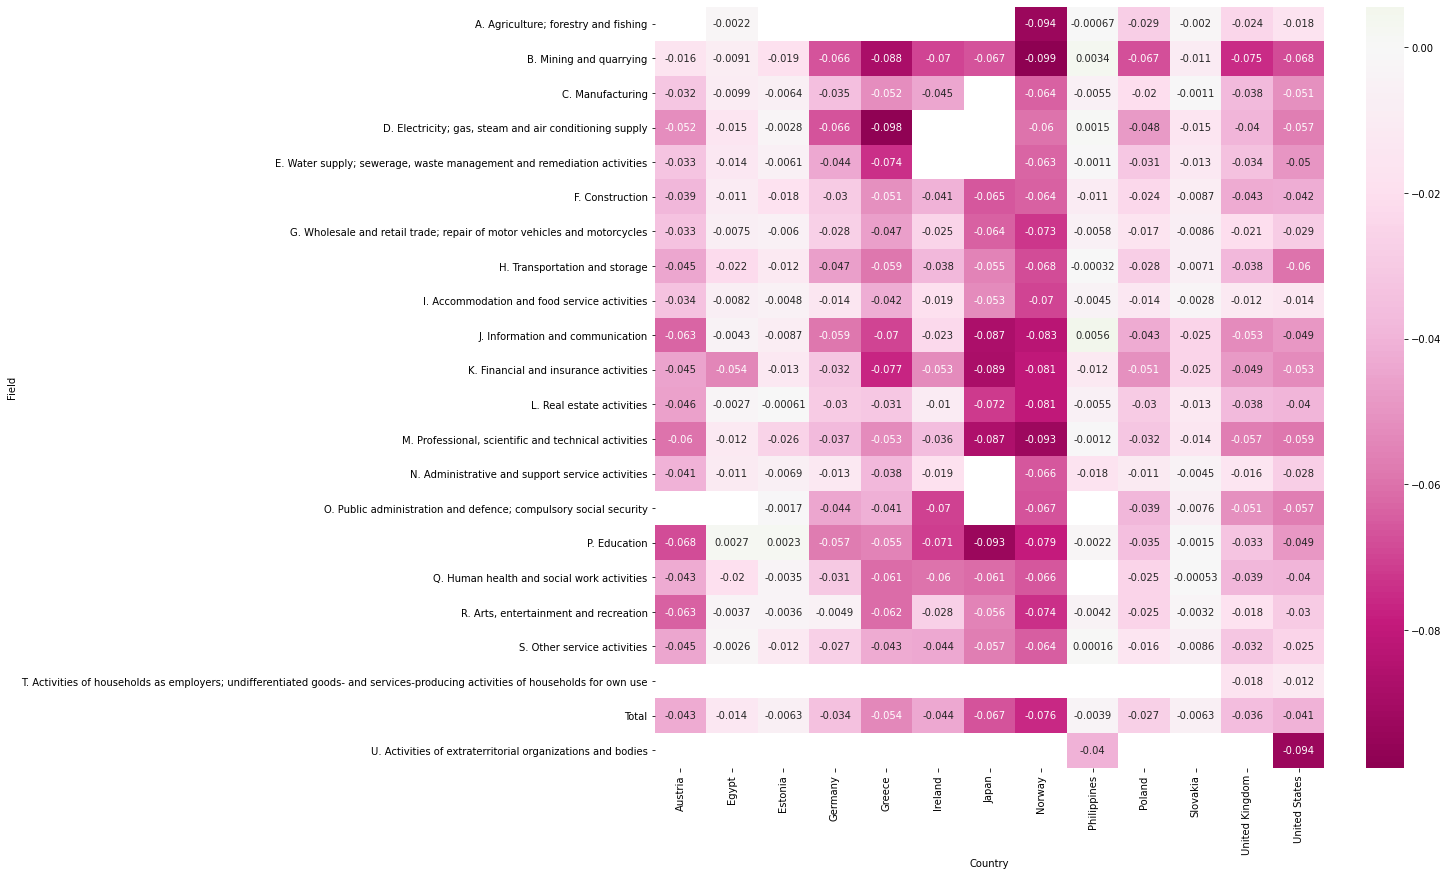

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

table = reduced_data.pivot_table(
        values='diff', 
        index="Field", 
        columns='Country')

fig, plot = plt.subplots(figsize = (15,14))
plot = sns.heatmap(table,cmap="PiYG",annot=True,center=0)

### Visualize global trend for fields

In [35]:
reduced_data["diff"].mean(level=1).sort_values().to_frame()

,diff
Field,
U. Activities of extraterritorial organizations and bodies,-0.067065
B. Mining and quarrying,-0.050238
K. Financial and insurance activities,-0.048700
"M. Professional, scientific and technical activities",-0.043579
J. Information and communication,-0.043168
O. Public administration and defence; compulsory social security,-0.042174
P. Education,-0.041554
"D. Electricity; gas, steam and air conditioning supply",-0.041139
Q. Human health and social work activities,-0.037463


### Conclusions

* Norway has high negative trend. <br> Developed countries have higher negative trend than developing countries, which is expected in perspective of crysis.

* All fields have negative trends for real wealth. <br> Negative trends of real wealth probably predicts global crysis.
